In [2]:
!pip install mlxtend

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

In [12]:
# iris = load_iris()
# iris.feature_names
# print(iris['data'])
# print(iris['DESCR'])
# X, y = iris.data, iris.target
# X
# iris

In [13]:
pd.DataFrame(X, columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [15]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
rf

RandomForestClassifier(n_jobs=-1, random_state=42)

In [16]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [19]:
# rf.criterion
# print(rf.max_depth)
rf.n_estimators # 100 decision tree since version 0.22
# rf.classes_



100

In [20]:
y_pred = rf.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2,
       1, 1, 2, 2, 1, 0, 2, 0])

In [21]:
y_test

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 1, 1, 0, 2, 0])

In [23]:
# conf_mat = metrics.confusion_matrix(y_test, y_pred)
# conf_mat
pd.DataFrame(conf_mat, columns=iris.target_names, index=iris.target_names)

,setosa,versicolor,virginica
setosa,10,0,0
versicolor,0,9,1
virginica,0,2,8


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

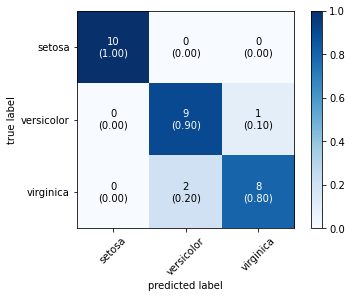

In [24]:
plot_confusion_matrix(conf_mat=conf_mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names=iris.target_names)

In [26]:
metrics.accuracy_score(y_test, y_pred)
# (1 - metrics.accuracy_score(y_test, y_pred)) * 100

0.9

In [21]:
(1 - rf.score(X_test, y_test)) * 100

9.999999999999998

# Tuning : n_estimators, max_features, max_depth, ... 

In [28]:
# max_depths ? 
max_depths = [i for i in np.linspace(start = 1, stop = 10, num = 10, dtype=int)]
max_depths.append(None)
max_depths

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]

## n_estimators (nb d'arbre) 

In [20]:
n_estimators = np.linspace(start = 1, stop = 300, num = 60, dtype = int)
n_estimators

array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  77,  82,  87,  92,  97, 102, 107, 112, 117, 122, 127,
       132, 137, 142, 147, 153, 158, 163, 168, 173, 178, 183, 188, 193,
       198, 203, 208, 213, 218, 223, 229, 234, 239, 244, 249, 254, 259,
       264, 269, 274, 279, 284, 289, 294, 300])

In [22]:
err_default = 9.99
errors = []
for estimator in n_estimators :
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state=42)
   rf.fit(X_train, y_train)
   err = round((1.0 - rf.score(X_test, y_test)) * 100, 3)
   errors.append(err)
   print(f"\n\nResults : n_estimators = {rf.n_estimators} => err_test = {err}\n\n")
   print('Improvement of {:0.2f}%.'.format(err_default - err))



Results : n_estimators = 1 => err_test = 3.333


Improvement of 6.66%.


Results : n_estimators = 6 => err_test = 10.0


Improvement of -0.01%.


Results : n_estimators = 11 => err_test = 3.333


Improvement of 6.66%.


Results : n_estimators = 16 => err_test = 6.667


Improvement of 3.32%.


Results : n_estimators = 21 => err_test = 6.667


Improvement of 3.32%.


Results : n_estimators = 26 => err_test = 6.667


Improvement of 3.32%.


Results : n_estimators = 31 => err_test = 6.667


Improvement of 3.32%.


Results : n_estimators = 36 => err_test = 6.667


Improvement of 3.32%.


Results : n_estimators = 41 => err_test = 6.667


Improvement of 3.32%.


Results : n_estimators = 46 => err_test = 10.0


Improvement of -0.01%.


Results : n_estimators = 51 => err_test = 10.0


Improvement of -0.01%.


Results : n_estimators = 56 => err_test = 10.0


Improvement of -0.01%.


Results : n_estimators = 61 => err_test = 10.0


Improvement of -0.01%.


Results : n_estimators = 66 => err_tes

Text(0, 0.5, 'err_test')

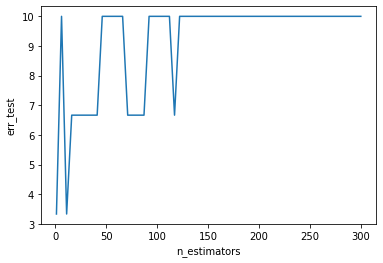

In [23]:
plt.plot(n_estimators, errors, label = 'test')
plt.xlabel('n_estimators')
plt.ylabel('err_test')

In [27]:
n_estimators = np.linspace(start = 1, stop = 300, num = 60, dtype = int)
errors = []
errors_test, errors_train, accuracy_oob = [], [], []
for estimator in n_estimators :
    rf = RandomForestClassifier(n_estimators=estimator, oob_score = True, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    err_test = round((1.0 - metrics.accuracy_score(y_test, y_pred)) * 100, 3)
    errors_test.append(err_test)
    train_pred = rf.predict(X_train)
    err_train = round((1.0 - metrics.accuracy_score(y_train, train_pred)) * 100, 3)
    errors_train.append(err_train)
    acc_oob = round(rf.oob_score_ * 100, 3)
    accuracy_oob.append(acc_oob)
    print(f"\n\nResults : n_estimators = {rf.n_estimators} => acc_oob = {acc_oob}, err_test = {err_test}, err_train = {err_train}\n\n")

C:\Users\bejao\miniconda3\envs\spark2.4py3.5\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\bejao\miniconda3\envs\spark2.4py3.5\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\bejao\miniconda3\envs\spark2.4py3.5\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\bejao\miniconda3\envs\spark2.4py3.5\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])




Results : n_estimators = 1 => acc_oob = 51.667, err_test = 6.667, err_train = 2.5




Results : n_estimators = 6 => acc_oob = 88.333, err_test = 10.0, err_train = 0.833




C:\Users\bejao\miniconda3\envs\spark2.4py3.5\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\bejao\miniconda3\envs\spark2.4py3.5\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])




Results : n_estimators = 11 => acc_oob = 92.5, err_test = 6.667, err_train = 0.0




C:\Users\bejao\miniconda3\envs\spark2.4py3.5\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\bejao\miniconda3\envs\spark2.4py3.5\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])




Results : n_estimators = 16 => acc_oob = 92.5, err_test = 6.667, err_train = 0.0




Results : n_estimators = 21 => acc_oob = 95.0, err_test = 3.333, err_train = 0.0




Results : n_estimators = 26 => acc_oob = 94.167, err_test = 10.0, err_train = 0.0




Results : n_estimators = 31 => acc_oob = 95.833, err_test = 3.333, err_train = 0.0




Results : n_estimators = 36 => acc_oob = 94.167, err_test = 6.667, err_train = 0.833




Results : n_estimators = 41 => acc_oob = 95.0, err_test = 10.0, err_train = 0.0




Results : n_estimators = 46 => acc_oob = 95.0, err_test = 10.0, err_train = 0.0




Results : n_estimators = 51 => acc_oob = 95.0, err_test = 6.667, err_train = 0.0




Results : n_estimators = 56 => acc_oob = 95.0, err_test = 6.667, err_train = 0.0




Results : n_estimators = 61 => acc_oob = 95.833, err_test = 6.667, err_train = 0.833




Results : n_estimators = 66 => acc_oob = 95.833, err_test = 6.667, err_train = 0.0




Results : n_estimators = 71 => acc_oob = 95.0, err_t

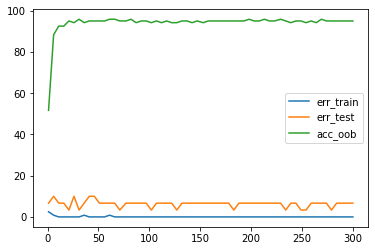

In [32]:
plt.plot(n_estimators, errors_train, label = 'err_train')
plt.plot(n_estimators, errors_test, label = 'err_test')
plt.plot(n_estimators, accuracy_oob, label = 'acc_oob')
plt.legend()

In [53]:
1-rf.oob_score_

0.050000000000000044

In [29]:
errors = []
err_default = 9.99
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1, random_state=42)
    rf.fit(X_train, y_train)
    err = round((1.0 - rf.score(X_test, y_test)) * 100, 3)
    errors.append(err)
    print(f"\n\nResults : max_depth = {rf.max_depth} => err_test = {err}\n")
    print(f'Improvement of {err_default - err}%\n\n')



Results : max_depth = 1 => err_test = 3.333

Improvement of 6.657%




Results : max_depth = 2 => err_test = 10.0

Improvement of -0.009999999999999787%




Results : max_depth = 3 => err_test = 3.333

Improvement of 6.657%




Results : max_depth = 4 => err_test = 3.333

Improvement of 6.657%




Results : max_depth = 5 => err_test = 6.667

Improvement of 3.3230000000000004%




Results : max_depth = 6 => err_test = 10.0

Improvement of -0.009999999999999787%




Results : max_depth = 7 => err_test = 10.0

Improvement of -0.009999999999999787%




Results : max_depth = 8 => err_test = 10.0

Improvement of -0.009999999999999787%




Results : max_depth = 9 => err_test = 10.0

Improvement of -0.009999999999999787%




Results : max_depth = 10 => err_test = 10.0

Improvement of -0.009999999999999787%




Results : max_depth = None => err_test = 10.0

Improvement of -0.009999999999999787%




Text(0.5, 0, 'max_depths')

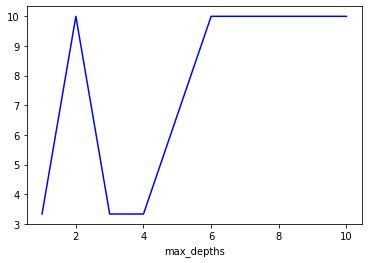

In [30]:
plt.plot(max_depths, errors, 'b')
plt.xlabel('max_depths')

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param = { "max_features":list(range(2, 5, 1)), "max_depth":[2, 3, 4, 5, None] }
param

{'max_features': [2, 3, 4], 'max_depth': [2, 3, 4, 5, None]}

In [33]:
rf = GridSearchCV(RandomForestClassifier(n_estimators=250, random_state = 42),
			        param, cv=5, n_jobs = -1)
rf
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'max_features': [2, 3, 4]})

In [34]:
pd.DataFrame(rf.cv_results_)[['param_max_features', 'mean_test_score', 'params']]
# rf.best_estimator_

,param_max_features,mean_test_score,params
0,2,0.941667,"{'max_depth': 2, 'max_features': 2}"
1,3,0.950000,"{'max_depth': 2, 'max_features': 3}"
2,4,0.950000,"{'max_depth': 2, 'max_features': 4}"
3,2,0.950000,"{'max_depth': 3, 'max_features': 2}"
4,3,0.950000,"{'max_depth': 3, 'max_features': 3}"
5,4,0.941667,"{'max_depth': 3, 'max_features': 4}"
6,2,0.950000,"{'max_depth': 4, 'max_features': 2}"
7,3,0.950000,"{'max_depth': 4, 'max_features': 3}"
8,4,0.950000,"{'max_depth': 4, 'max_features': 4}"
9,2,0.950000,"{'max_depth': 5, 'max_features': 2}"


In [39]:
1-rf.score(X_test, y_test)

0.033333333333333326

In [31]:
# Créer 1df qui contient les features et leur importance
feature = [column for column in iris.feature_names]
importance = np.round(rf.best_estimator_.feature_importances_ * 100, 2)
feature_importance = pd.DataFrame({'feature' : feature, 'importance' : importance})
feature_importance

,feature,importance
0,sepal length (cm),0.01
1,sepal width (cm),0.01
2,petal length (cm),47.76
3,petal width (cm),52.22


In [32]:
feature_importances = rf.best_estimator_.feature_importances_
pd.DataFrame({'feature' : iris.feature_names, 'importance' : feature_importances}).sort_values('importance', ascending=False)

,feature,importance
3,petal width (cm),0.522232
2,petal length (cm),0.477635
0,sepal length (cm),0.000070
1,sepal width (cm),0.000064


In [33]:
rf.best_estimator_.feature_importances_

RandomForestClassifier(max_depth=2, max_features=3, n_estimators=250,
                       random_state=42)